<a href="https://colab.research.google.com/github/marco-siino/GM_SOURCE_CODE/blob/main/NVIDIA_DS/Prompting_Mistral_Large_Heterogeneus_Device_Mapping_DS_Devmap_Nvidia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Additional experiments for EAAI Submission. Prompt engineering for device mapping (GPU vs CPU) using Mistral Large.

Streaming output truncated to the last 5000 lines.
    return;
  __global double(*l)[12 / 2 * 2 + 1][12 / 2 * 2 + 1][5] = (__global double(*)[12 / 2 * 2 + 1][12 / 2 * 2 + 1][5])a;
  __global double(*m)[12 + 2] = (__global double(*)[12 + 2])b;
  __global double(*n)[12 + 2] = (__global double(*)[12 + 2])c;
  m[k][j] = 0.40e+00 * (l[k][j][d][4] - 0.50 * (l[k][j][d][1] * l[k][j][d][1] + l[k][j][d][2] * l[k][j][d][2] + l[k][j][d][3] * l[k][j][d][3]) / l[k][j][d][0]);
  n[k][j] = 0.40e+00 * (l[k][j][e - 1][4] - 0.50 * (l[k][j][e - 1][1] * l[k][j][e - 1][1] + l[k][j][e - 1][2] * l[k][j][e - 1][2] + l[k][j][e - 1][3] * l[k][j][e - 1][3]) / l[k][j][e - 1][0]);
}
```
**Label: GPU**

**Reasoning**:
- This kernel has a high degree of parallelism with independent operations on each element.
- The memory access patterns are regular and can be coalesced.
- The computations involve arithmetic operations on arrays, indicating high computational intensity.
- No synchronization or communication overhead.

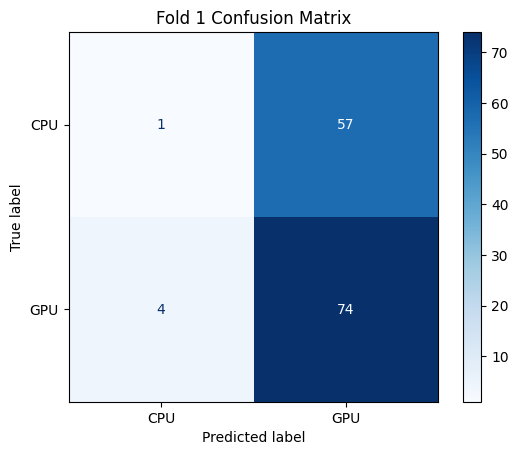

Streaming output truncated to the last 5000 lines.
    y[0][m] = y[1][m];
    y[1][m] = y[2][m];
    z[0][m] = z[1][m];
  }
  aa[4][0] = ac[j][l][h][0];
  aa[4][1] = ac[j][l][h][1];
  aa[4][2] = ac[j][l][h][2];
  aa[4][3] = ac[j][l][h][3];
  aa[4][4] = ac[j][l][h][4];
  y[2][0] = aa[3][2];
  p = aa[3][2] * af[j][k][h];
  n = ae[j][k][h];
  y[2][1] = aa[3][1] * p;
  y[2][2] = aa[3][2] * p + 0.40e+00 * (aa[3][4] - n);
  y[2][3] = aa[3][3] * p;
  y[2][4] = (1.40e+00 * aa[3][4] - 0.40e+00 * n) * p;
  o = af[j][k][h];
  q = o * aa[3][1];
  r = o * aa[3][2];
  s = o * aa[3][3];
  t = o * aa[3][4];
  o = af[j][i][h];
  u = o * aa[2][1];
  v = o * aa[2][2];
  w = o * aa[2][3];
  x = o * aa[2][4];
  z[1][1] = (1.0 / (1.0 / (12 - 1))) * (q - u);
  z[1][2] = (4.0 / 3.0) * (1.0 / (1.0 / (12 - 1))) * (r - v);
  z[1][3] = (1.0 / (1.0 / (12 - 1))) * (s - w);
  z[1][4] = 0.50 * (1.0 - 1.40e+00 * 1.40e+00) * (1.0 / (1.0 / (12 - 1))) * ((q * q + r * r + s * s) - (u * u + v * v + w * w)) + (1.0 / 6.0) * 

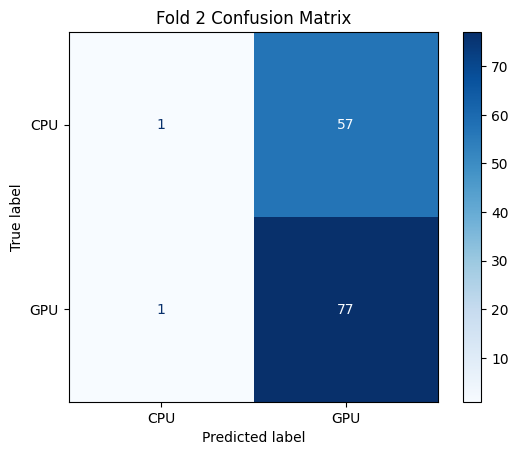


Fold 3

######### Avvio Predizione Numero 0 del validation set relativo al FOLD 2 ###########
[0] Pred: GPU | True: GPU | GPT output: To determine whether an OpenCL kernel should run on the CPU or GPU, consider the following characteristics:

1. **Parallelism**: Kernels with high parallelism and many independent work-items benefit from running on a GPU.
2. **Memory Access Patterns**: Kernels that use coalesced memory access patterns and utilize shared memory efficiently are better suited for GPUs.
3. **Computational Intensity**: Kernels with high computational intensity (many arithmetic operations per memory access) are more suitable for GPUs.
4. **Synchronization**: Kernels with frequent synchronization points may be better suited for CPUs, as GPUs may suffer from synchronization overhead.
5. **Complex Control Flow**: Kernels with complex control flow, branching, and conditional statements may perform better on CPUs due to their more advanced branch prediction and handling capabiliti

In [ ]:
!pip install mistralai
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from mistralai import Mistral
from tqdm import tqdm

# Inizializza Mistral API
client = Mistral(api_key='7yOu0lH5XcZC1U2ZUI2uv0ghBDduhHp5')
model = "mistral-large-latest"

# Carica dataset
df = pd.read_csv("/content/dataset-devmap-nvidia.csv")
df = df[["src", "oracle"]]  # src = codice, oracle = label ("CPU"/"GPU")

# Mapping etichette
text_to_label = {"CPU": 0, "GPU": 1}
label_to_text = {0: "CPU", 1: "GPU"}

# Seed per riproducibilità
random.seed(42)
np.random.seed(42)

# Setup K-Fold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []

for fold, (train_idx, val_idx) in enumerate(kfold.split(df["src"], df["oracle"])):
    print(f"\nFold {fold + 1}")
    train_df = df.iloc[train_idx]
    val_df = df.iloc[val_idx]

    # Prompt iniziale con istruzioni
    few_shot_prompt = (
        "Classify whether the following OpenCL kernel should run on CPU or GPU based on its characteristics.\n"
        "The label should be either 'CPU' or 'GPU'.\n\n"
    )

    # Seleziona 5 esempi few-shot
    few_shot_samples = train_df.sample(n=5, random_state=fold)
    for _, row in few_shot_samples.iterrows():
        few_shot_prompt += f"Code:\n{row['src']}\nLabel: {row['oracle']}\n\n"

    preds = []
    golds = []
    texts = []

    for i, (code_snippet, true_label) in enumerate(zip(val_df["src"], val_df["oracle"])):
        print("\n######### Avvio Predizione Numero "+str(i)+" del validation set relativo al FOLD " +str(fold) + " ###########")
        golds.append(text_to_label[true_label])
        prompt = few_shot_prompt + f"Code:\n{code_snippet}\nLabel:"
        message = [{"role": "user", "content": prompt}]

        try:
            chat_response = client.chat.complete(
                model=model,
                messages=message
            )
            completion = chat_response.choices[0].message.content.strip()

            # Normalizzazione
            if "gpu" in completion.lower():
                pred_label = 1
            elif "cpu" in completion.lower():
                pred_label = 0
            else:
                pred_label = random.choice([0, 1])  # fallback

        except Exception as e:
            print(f"Errore nella predizione: {e}")
            pred_label = random.choice([0, 1])

        preds.append(pred_label)
        texts.append(completion)
        print(f"[{i}] Pred: {label_to_text[pred_label]} | True: {true_label} | GPT output: {completion}")
        print("\n######### PREDIZIONE TERMINATA. Numero "+str(i)+" del validation set relativo al FOLD " +str(fold) + " ###########")

    # Accuracy e confusion matrix
    acc = accuracy_score(golds, preds)
    print(f"Fold {fold + 1} accuracy: {acc:.4f}")
    accuracies.append(acc)

    cm = confusion_matrix(golds, preds, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["CPU", "GPU"])
    disp.plot(cmap="Blues")
    plt.title(f"Fold {fold + 1} Confusion Matrix")
    plt.show()

# Media finale
print(f"\nAverage accuracy over all folds: {np.mean(accuracies):.4f}")
